In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmaps

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [75]:
df = pd.read_csv('C:/Users/br_bo/Desktop/PINN_example2/predictions.csv')

# 选择第一个维度的数据，这里假设是 CSV 文件的第一列
# u
data1 = df.iloc[:, 0].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
print(data1.shape)
reshaped_data1 = data1.reshape((3, 1, 201, 201))
# v
data2 = df.iloc[:, 1].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_data2 = data2.reshape((3, 1, 201, 201))

(121203,)


In [76]:
# 假设你的数据维度和范围
lon = np.linspace(180, 230, 201)  # 示例经度范围
lat = np.linspace(-4, 46, 201)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
selected_u = reshaped_data1[0, 0, :, :]
selected_v = reshaped_data2[0, 0, :, :]
wind_speed = np.sqrt(selected_v**2 + selected_u**2)

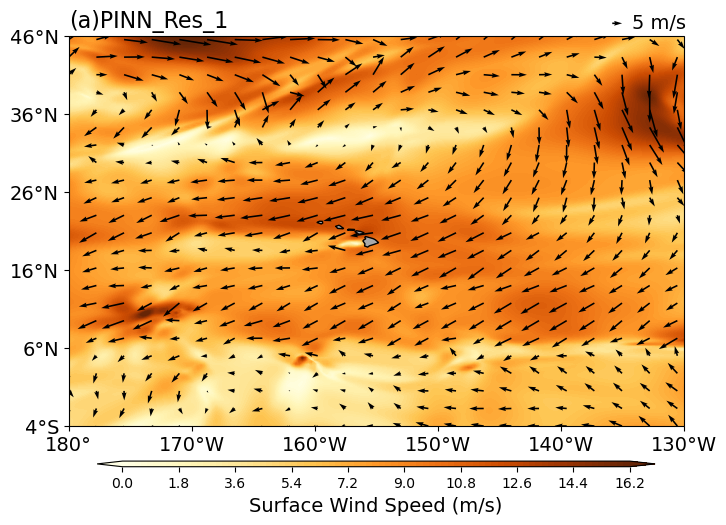

In [79]:
fig = plt.figure(figsize=(8, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([180, 230, -4, 46], crs=ccrs.PlateCarree())
# ax.set_extent([0, 20, -70, 70], crs=ccrs.PlateCarree())

# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))

contourf = plt.contourf(lon, lat, wind_speed, levels=np.arange(0, 16.4, 0.2),transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.07, shrink=0.9, aspect=90)
quiver = plt.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],transform=ccrs.PlateCarree())



# 添加 5 m/s 的风速标注
qk = plt.quiverkey(quiver, X=0.82, Y=0.899, U=5, label='5 m/s', labelpos='E', coordinates='figure', )
qk.text.set_fontsize(14)  # 更改风速标注的字体大小
# 给色标命名
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 添加陆地和海洋，设置颜色
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='darkgrey', zorder=2)
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=0)
 

# 定义网格的间隔
lon_ticks = range(0, 51, 10)   # 90E 到 300E，每30度一个网格
lat_ticks = range(-4, 47, 10)   # -60 到 70，每30度一个网格
# 使用 matplotlib 设置刻度线
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
# 设置刻度线标签样式并显示大小
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 设置经纬度标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.text(159.7, -2.3, 'Ⅴ', fontsize=17, color='black', fontname='Times New Roman', fontweight='bold',verticalalignment='bottom', horizontalalignment='left')

# plt.legend()
# plt.legend()
plt.title('(a)PINN_Res_1',fontsize = 16,loc='left')
ax.set_aspect(0.635)
plt.savefig('E:/PINN2/fig4/aPINN_Res_1.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/grl/gPINN_Res-ERA5.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/PINN_ResND-CCMP.png',bbox_inches='tight')
plt.show()